In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm.auto import tqdm
import pandas as pd
os.chdir("..")

In [2]:
from car_tracking.frame_generator import FrameGen
from car_tracking.background_subtractor import BackgroundSubstraction
from car_tracking.car_extractor import CarExtractor
from car_tracking.car_extractor import ExtractionReport
from car_tracking.tracker import Tracker

In [3]:
video_path = 'data/highway.mp4'
sample_rate = 2 

In [4]:
gen = FrameGen(video_path, sample_rate)

In [5]:
bs = BackgroundSubstraction(batch_size=100, inner_sample_rate = 1)
bs.fit(gen)

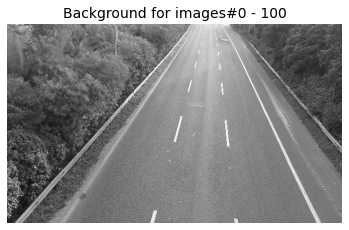

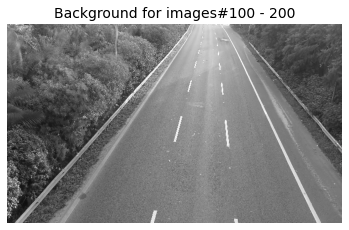

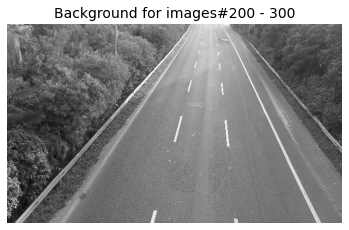

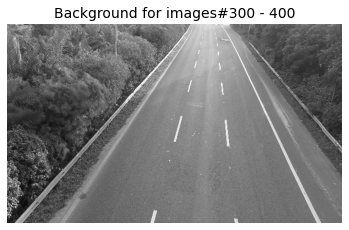

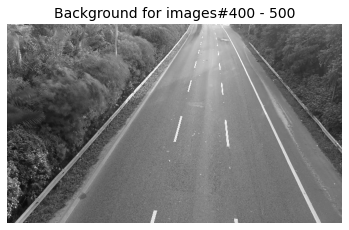

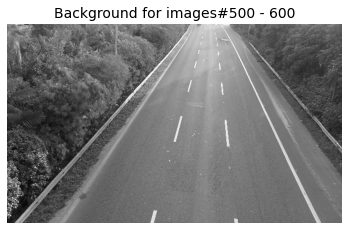

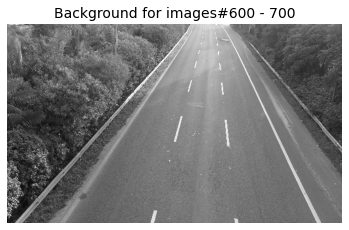

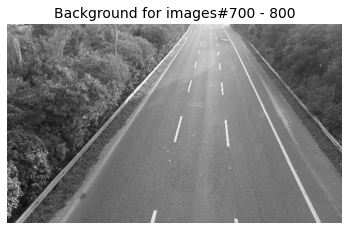

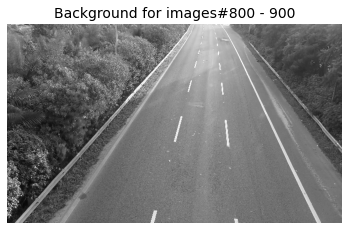

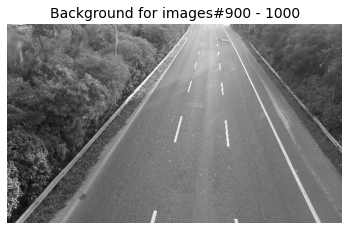

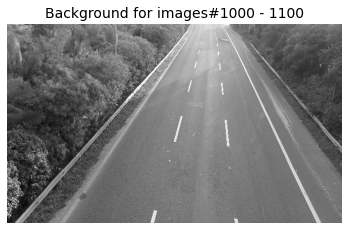

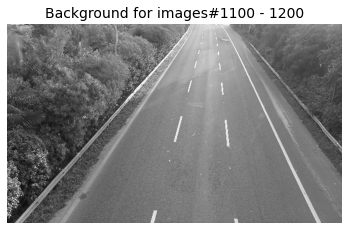

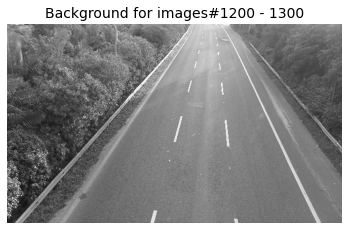

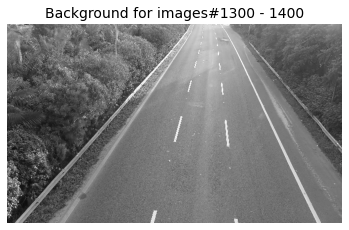

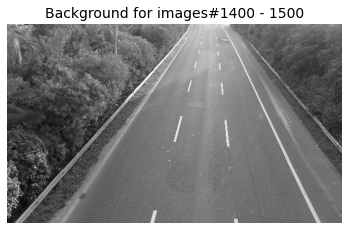

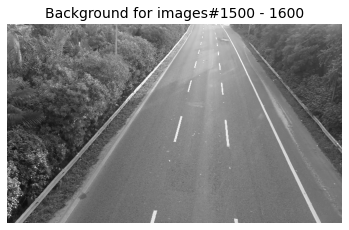

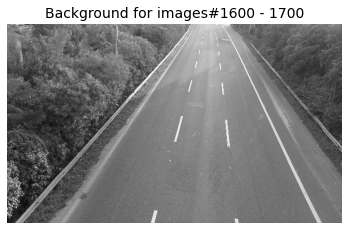

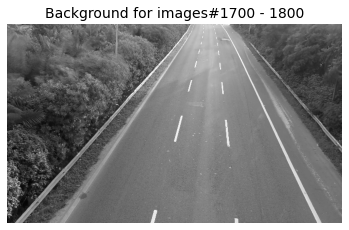

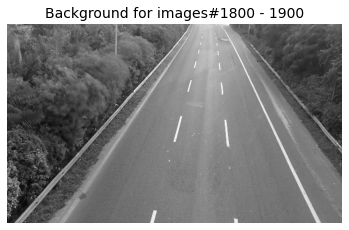

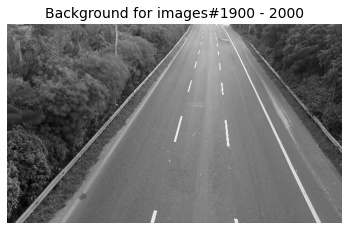

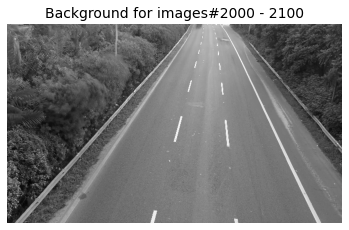

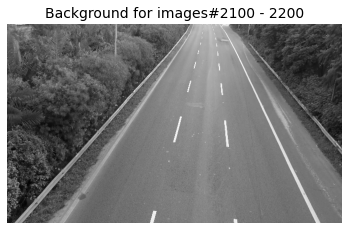

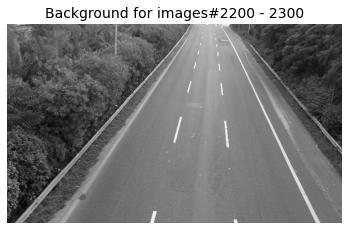

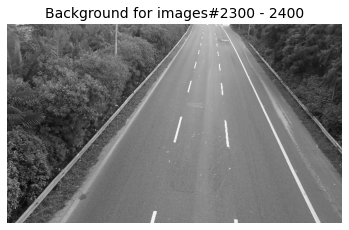

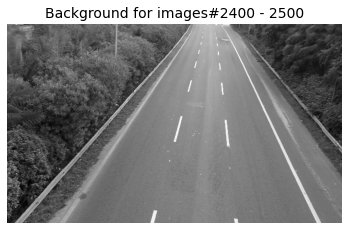

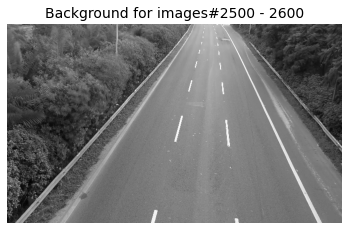

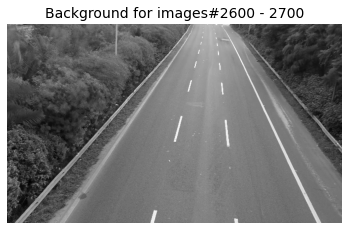

In [6]:
bs.visualize()

In [15]:
car_extract = CarExtractor(bs, 3, 13, 500)
selected_bboxes, selected_sources  = car_extract.run(gen)

In [17]:
extraction_report = ExtractionReport(gen, selected_bboxes, selected_sources)
extraction_report.report

,bbox_xywh,frame
bbox_idx,,
0,"(555, 325, 48, 55)",0
1,"(544, 303, 45, 77)",1
2,"(535, 283, 42, 78)",2
3,"(528, 266, 39, 73)",3
4,"(520, 250, 37, 71)",4
...,...,...
3523,"(328, 118, 55, 71)",2695
3524,"(414, 114, 45, 52)",2695
3525,"(495, 133, 19, 37)",2696


In [18]:
extraction_report.save_crops('outputs/saved_crops/')
extraction_report.report.to_csv("outputs/extraction_report.csv")

In [19]:
tracker = Tracker(extraction_report, 0.01)
tracker.run(gen)

In [20]:
tracker.save_by_trackid(gen, 'outputs/tracks/')

In [21]:
tracker.tracking_df.to_csv("outputs/tracking_report.csv")
tracker.tracking_df

,bbox_xywh,frame,track_id
bbox_idx,,,
0,"(555, 325, 48, 55)",0,0
1,"(544, 303, 45, 77)",1,0
2,"(535, 283, 42, 78)",2,0
3,"(528, 266, 39, 73)",3,0
4,"(520, 250, 37, 71)",4,0
...,...,...,...
3523,"(328, 118, 55, 71)",2695,3488
3524,"(414, 114, 45, 52)",2695,3458
3525,"(495, 133, 19, 37)",2696,3525


In [22]:
tracker.save_by_trackid(gen, 'outputs/unique_tracks/', unique_only=True)